https://www.researchgate.net/profile/Majid-Aljalal/publication/327327559_A_Comparative_Study_of_Wavelet_and_CSP_Features_Classified_Using_LDA_SVM_and_ANN_in_EEG_Based_Motor_Imagery/links/62d60de1d624055892756038/A-Comparative-Study-of-Wavelet-and-CSP-Features-Classified-Using-LDA-SVM-and-ANN-in-EEG-Based-Motor-Imagery.pdf?origin=publication_detail

<div align="center">
  <img src="https://cdn.discordapp.com/attachments/1131886476397903962/1141015213978689566/image.png">
</div>

In [15]:
import mne
from mne.datasets import eegbci
from mne.io import concatenate_raws, read_raw_edf
import glob
import numpy as np

In [2]:
files = glob.glob('../../files/S001/*.edf')
'''
=========  ===================================
run        task
=========  ===================================
1          Baseline, eyes open
2          Baseline, eyes closed
3, 7, 11   Motor execution: left vs right hand
4, 8, 12   Motor imagery: left vs right hand
5, 9, 13   Motor execution: hands vs feet
6, 10, 14  Motor imagery: hands vs feet
=========  ===================================
'''
raws = []

for i in [5, 9, 13]:
    current_file = files[i]
    r = read_raw_edf(current_file, preload=True, stim_channel='auto')
    events, _ = mne.events_from_annotations(r)
    if i in [5, 9, 13]:
        new_labels_events = {1:'rest', 2:'action_hand', 3:'action_feet'} # action
    new_annot = mne.annotations_from_events(events=events, event_desc=new_labels_events, sfreq=r.info['sfreq'], orig_time=r.info['meas_date'])
    r.set_annotations(new_annot)
    raws.append(r)
    
raw_obj = concatenate_raws(raws)

Extracting EDF parameters from /Users/owalid/42/post_intership/total-perspective-vortex/files/S001/S001R03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /Users/owalid/42/post_intership/total-perspective-vortex/files/S001/S001R13.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from /Users/owalid/42/post_intership/total-perspective-vortex/files/S001/S001R09.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']


In [5]:
raw = raw_obj.copy()

In [6]:
events, event_dict = mne.events_from_annotations(raw)
print(raw.info)
print(event_dict)
eegbci.standardize(raw)
montage = mne.channels.make_standard_montage('standard_1005')
raw.set_montage(montage)

Used Annotations descriptions: ['action_feet', 'action_hand', 'rest']
<Info | 7 non-empty values
 bads: []
 ch_names: Fc5., Fc3., Fc1., Fcz., Fc2., Fc4., Fc6., C5.., C3.., C1.., ...
 chs: 64 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 80.0 Hz
 meas_date: 2009-08-12 16:15:00 UTC
 nchan: 64
 projs: []
 sfreq: 160.0 Hz
>
{'action_feet': 1, 'action_hand': 2, 'rest': 3}


<RawEDF | S001R03.edf, 64 x 60000 (375.0 s), ~29.4 MB, data loaded>

Fitting ICA to data using 64 channels (please be patient, this may take a while)


/var/folders/s9/mx70pkk11bq2wl2cnrt6nfwc0000gn/T/ipykernel_84880/1465914308.py:2: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 20 components
Fitting ICA took 1.9s.
    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
62 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
62 matching events found
No baseline correction applied
0 projection items activated


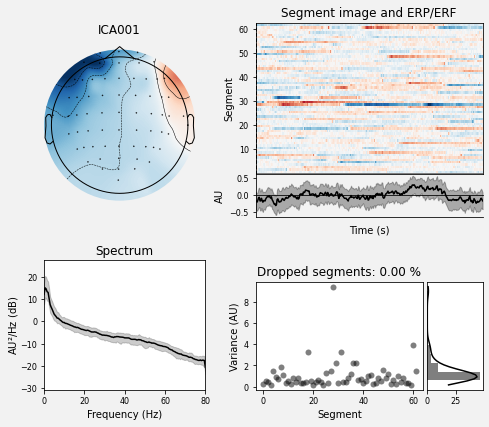

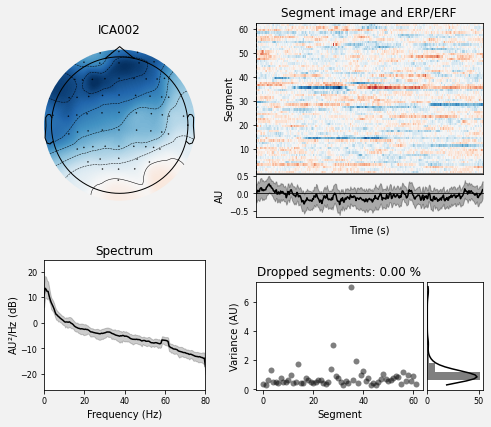

[<Figure size 504x432 with 6 Axes>, <Figure size 504x432 with 6 Axes>]

In [7]:
ica = mne.preprocessing.ICA(n_components=20, random_state=97, max_iter=800)
ica.fit(raw)
ica.exclude = [1, 2]  # details on how we picked these are omitted here
ica.plot_properties(raw, picks=ica.exclude)


In [13]:
picks = mne.pick_types(raw.info, meg=True, eeg=True, stim=False, eog=False, exclude='bads')
event_id = {'action_hand': 1, 'action_feet': 2}
events, event_dict = mne.events_from_annotations(raw, event_id=event_id)
tmin = -0.5  # Time before event in seconds
tmax = 4.  # Time after event in seconds
epochs = mne.Epochs(raw, events, event_dict, tmin, tmax, proj=True, picks=picks, baseline=None, preload=True)

Used Annotations descriptions: ['action_feet', 'action_hand']
Not setting metadata
45 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 45 events and 721 original time points ...
0 bad epochs dropped


In [79]:
frequencies = np.arange(4, 40, 2)
power = mne.time_frequency.tfr_morlet(
    epochs, n_cycles=2, return_itc=False, freqs=frequencies/2, decim=3
)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    2.1s finished


In [81]:
epochs_power = list()

for i in range(0, len(epochs.events)):
    tfr = mne.time_frequency.tfr_morlet(epochs[i], n_cycles=2, return_itc=False, freqs=frequencies/2, decim=3)
    epochs_power.append(tfr.data)

epochs_power = np.array(epochs_power)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with

In [83]:
epochs_power.shape

(45, 64, 18, 241)

In [87]:
epochs_reshape = epochs_power.reshape(epochs_power.shape[0], epochs_power.shape[1], epochs_power.shape[2]*epochs_power.shape[3])

In [88]:
epochs_reshape.shape

(45, 64, 4338)

In [96]:
flattened_epochs_power = epochs_reshape.reshape(epochs_reshape.shape[0], -1)
flattened_epochs = epochs.get_data().reshape(epochs.get_data().shape[0], -1)

In [98]:
combined_features = np.concatenate((flattened_epochs_power, flattened_epochs), axis=1)

In [101]:
X = combined_features.reshape(combined_features.shape[0], epochs_reshape.shape[1], -1)

In [102]:
y = epochs.events[:, -1] - 1

In [117]:

import os
import sys
import random
import joblib
import numpy as np

import mne
from mne.io import concatenate_raws, read_raw_edf
import matplotlib.pyplot as plt
import glob

from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.model_selection import ShuffleSplit, cross_val_score
from sklearn.ensemble import RandomForestClassifier


from sklearn.pipeline import Pipeline
from sklearn.model_selection import  ShuffleSplit
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost.sklearn import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate

In [118]:
shuffle_split = ShuffleSplit(n_splits=7, test_size=0.2, random_state=42)
pipeline = Pipeline([
    ('csp', mne.decoding.CSP(n_components=4, reg=None, log=True, norm_trace=False)),
    ('clf', LinearDiscriminantAnalysis()),
    ('svm', SVC(kernel='linear', C=1))
], verbose=True)

In [123]:
scores = cross_validate(pipeline, X, y, cv=shuffle_split, n_jobs=1, return_estimator=True)

Computing rank from data with rank=None
    Using tolerance 0.00047 (2.2e-16 eps * 64 dim * 3.3e+10  max singular value)
    Estimated rank (mag): 64
    MAG: rank 64 computed from 64 data channels with 0 projectors
Reducing data rank from 64 -> 64
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00042 (2.2e-16 eps * 64 dim * 2.9e+10  max singular value)
    Estimated rank (mag): 64
    MAG: rank 64 computed from 64 data channels with 0 projectors
Reducing data rank from 64 -> 64
Estimating covariance using EMPIRICAL
Done.
[Pipeline] ............... (step 1 of 3) Processing csp, total=   2.0s
[Pipeline] ............... (step 2 of 3) Processing clf, total=   0.0s
[Pipeline] ............... (step 3 of 3) Processing svm, total=   0.0s
Computing rank from data with rank=None
    Using tolerance 0.00052 (2.2e-16 eps * 64 dim * 3.6e+10  max singular value)
    Estimated rank (mag): 64
    MAG: rank 64 computed from 64 data channels wit

In [124]:
np.mean(scores['test_score'])

0.5079365079365079

In [77]:
power

<AverageTFR | time : [-0.500000, 4.000000], freq : [3.500000, 14.000000], nave : 45, channels : 64, ~1.0 MB>

In [36]:
epochs.events.shape

(45, 3)

In [43]:
epochs.get_data().shape
# (n_epochs, n_channels, n_times)

(45, 64, 721)

In [80]:
power_data.shape
# (n_channels, n_freqs, n_times)

(64, 8, 241)

In [73]:
from scipy.stats import entropy
power_data = power.data

mean_power_d = power_data.mean(axis=1)
std_power_d = power_data.std(axis=1)
var_power_d = power_data.var(axis=1)
entropy_power_d = entropy(power_data, axis=1)
energy_power_d = power_data.sum(axis=1)
bp_power_d = power_data[:, :, 0:3].sum(axis=1)

print(mean_power_d.shape)
print(std_power_d.shape)
print(var_power_d.shape)
print(entropy_power_d.shape)
print(energy_power_d.shape)
print(bp_power_d.shape)

(64, 241)
(64, 241)
(64, 241)
(64, 241)
(64, 241)
(64, 3)


In [49]:
n_epochs, n_channels, n_times = epochs.get_data().shape
tfr_data = power.data  # NumPy array of shape (n_epochs, n_channels, n_frequencies, n_times)
flattened_data = tfr_data.ravel()
features = flattened_data.reshape(n_epochs, -1)  # Flatten to (n_epochs, n_channels * n_frequencies * n_times)

ValueError: cannot reshape array of size 123392 into shape (45,newaxis)

In [ ]:
aud_evoked = aud_epochs.average()
vis_evoked = vis_epochs.average()

mne.viz.plot_compare_evokeds(
    dict(auditory=aud_evoked, visual=vis_evoked),
    legend="upper left",
    show_sensors="upper right",
)